## Day 77 Lecture 1 Assignment

In this assignment, we will learn about activation functions. We will create a neural network and measure the model's performance using different activations.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We will import the famous titanic dataset below and produce a neural network that will predict the chance of survival for a passenger.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We'll perform some feature engineering

Let's start by keeping only the columns we'd like to use for our analysis. Keep only the columns: Survived, Pclass, Sex, SibSp, Parch, and Embarked

In [5]:
# Answer below:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Embarked  889 non-null    object
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


Now examine how many rows contain missing data. Given how much missing data we have, should we remove the column with the most missing data, or remove all rows containing missing data? Do what you think is best.

In [6]:
# Answer below: 
titanic.dropna(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Sex       889 non-null    object
 3   SibSp     889 non-null    int64 
 4   Parch     889 non-null    int64 
 5   Embarked  889 non-null    object
dtypes: int64(4), object(2)
memory usage: 48.6+ KB


Now we'll create a one hot encoding of the variables Pclass, sex, and Embarked

In [7]:
# Answer below:
display(titanic['Pclass'].value_counts())
display(titanic['Sex'].value_counts())
display(titanic['Embarked'].value_counts())

3    491
1    214
2    184
Name: Pclass, dtype: int64

male      577
female    312
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
t_dummies = pd.get_dummies(titanic, columns=['Pclass', 'Sex', 'Embarked'],
                           drop_first=True)

t_dummies

,Survived,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,0,1
887,1,0,0,0,0,0,0,1
888,0,1,2,0,1,0,0,1
889,1,0,0,0,0,1,0,0


Split the data into train and test. 20% of the data should be set aside for testing. Use Survived as your target variable.

In [9]:
# Answer below
X = t_dummies.drop('Survived', 1)
y = t_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

At this point, we are ready to create a model. Import `Sequential` and `Dense` from Keras

Create a model with 5 layers. The first layer should be a dense layer that receives the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a tanh activation for the output layer.

In [10]:
# Answer below:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


Compile the model using the adam optimizer, binary crossentropy loss, and the accuracy metric.

Fit the model using a batch size of 80 over 200 epochs.

In [12]:
# Answer below:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=200, batch_size=80, 
          validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 64ms/step - loss: 6.2387 - accuracy: 0.5955 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 5.7653 - accuracy: 0.6262 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 5.9457 - accuracy: 0.6145 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 5.8830 - accuracy: 0.6186 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 5.7163 - accuracy: 0.6294 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 6/200
9/9 [==============================] - 0s 19ms/step - loss: 5.6153 - accuracy: 0.6360 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 5.9055 - accuracy: 0.6171 - val_loss: 5.7194 - val_accuracy: 0.6292
Epoch 8/200
9/9 [========

In [13]:
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}\n Test accuracy: {score[1]}')

6/6 [==============================] - 0s 1ms/step - loss: 5.7194 - accuracy: 0.6292
Test loss: 5.719362735748291
 Test accuracy: 0.6292135119438171


Redefine the model using a sigmoid activation for the last layer. What is the difference in accuracy.

In [14]:
# Answer below
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=200, batch_size=80, 
          validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 0.6936 - accuracy: 0.5334 - val_loss: 0.6658 - val_accuracy: 0.6404
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.6075 - val_loss: 0.6289 - val_accuracy: 0.6292
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.6287 - val_loss: 0.5880 - val_accuracy: 0.6461
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5768 - accuracy: 0.6939 - val_loss: 0.5455 - val_accuracy: 0.7697
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7917 - val_loss: 0.5128 - val_accuracy: 0.7640
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5154 - accuracy: 0.7710 - val_loss: 0.4869 - val_accuracy: 0.7640
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4531 - accuracy: 0.8082 - val_loss: 0.4864 - val_accuracy: 0.7978
Epoch 8/200
9/9 [=========

In [15]:
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}\n Test accuracy: {score[1]}')

6/6 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.7640
Test loss: 0.6579905152320862
 Test accuracy: 0.7640449404716492


# Lecture Notes

In [16]:
def relu(x):
  if x > 0:
    return x
    
  return 0

In [17]:
x = np.linspace(-5,5,101)
y = [relu(z) for z in x]

In [18]:
df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,-5.0,0.0
1,-4.9,0.0
2,-4.8,0.0
3,-4.7,0.0
4,-4.6,0.0
...,...,...
96,4.6,4.6
97,4.7,4.7
98,4.8,4.8
99,4.9,4.9


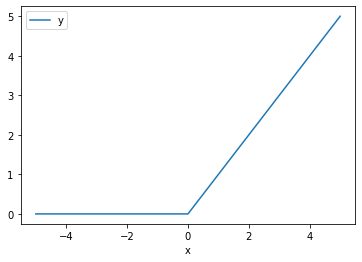

In [19]:
df.plot(x='x',y='y', kind='line')

In [20]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

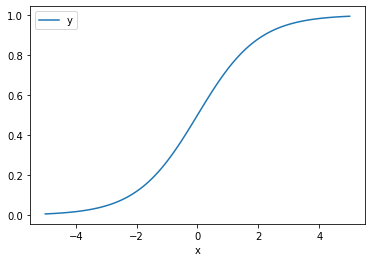

In [21]:
x = np.linspace(-5,5,101)
y = [sigmoid(z) for z in x]
df = pd.DataFrame({'x':x, 'y':y})
df.plot(x='x',y='y', kind='line')

In [22]:
def leaky_relu(x):
  if x > 0:
    return x
    
  return x*0.01

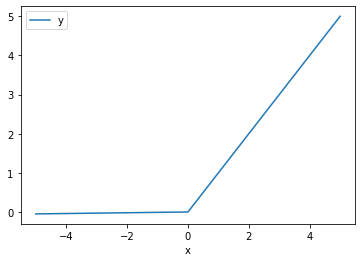

In [23]:
x = np.linspace(-5,5,101)
y = [leaky_relu(z) for z in x]
df = pd.DataFrame({'x':x, 'y':y})
df.plot(x='x',y='y', kind='line')

In [24]:
def prelu(x, a):
  if x > 0:
    return x
    
  return x*a

In [25]:
csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

In [26]:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              80 non-null     int64
 1   Delivery number  80 non-null     int64
 2   Delivery time    80 non-null     int64
 3   Blood Pressure   80 non-null     int64
 4   Heart Problem    80 non-null     int64
 5   Caesarian        80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [27]:
c_dummy = pd.get_dummies(csection, columns=['Delivery number', 'Delivery time', 'Blood Pressure'], drop_first=True)

x = c_dummy.drop(columns=['Caesarian'])
y = c_dummy['Caesarian']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
X_train.shape[1]

9

In [30]:
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=20, batch_size=20, 
          validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 61ms/step - loss: 0.9238 - accuracy: 0.5525 - val_loss: 0.7034 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 0s 14ms/step - loss: 0.7124 - accuracy: 0.5083 - val_loss: 1.0033 - val_accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 0s 15ms/step - loss: 0.7153 - accuracy: 0.5600 - val_loss: 0.7900 - val_accuracy: 0.3750
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 0.6367 - accuracy: 0.6146 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 0s 13ms/step - loss: 0.6885 - accuracy: 0.4946 - val_loss: 0.6654 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 0s 14ms/step - loss: 0.7305 - accuracy: 0.5192 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 0s 17ms/step - loss: 0.6554 - accuracy: 0.5946 - val_loss: 0.7494 - val_accuracy: 0.4375
Epoch 8/20
4/4 [===========

In [34]:
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #use 'softmax' for multiclass

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20, 
          validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 105ms/step - loss: 1.8778 - accuracy: 0.5171 - val_loss: 1.0258 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 1.3924 - accuracy: 0.5538 - val_loss: 0.8153 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 0s 14ms/step - loss: 1.0814 - accuracy: 0.5554 - val_loss: 0.6676 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 0.8277 - accuracy: 0.5538 - val_loss: 0.6208 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 0s 12ms/step - loss: 0.7372 - accuracy: 0.5254 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 0s 13ms/step - loss: 0.7058 - accuracy: 0.4450 - val_loss: 0.7405 - val_accuracy: 0.3125
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 0.7317 - accuracy: 0.4379 - val_loss: 0.7431 - val_accuracy: 0.3125
Epoch 8/20
4/4 [==========

In [37]:
df = pd.DataFrame(history.history)

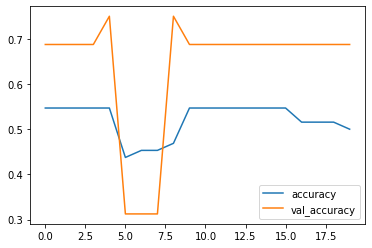

In [38]:
df[['accuracy', 'val_accuracy']].plot()